In [1]:
#import packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

#import data file & preview data 
df = pd.read_csv('/Users/Amanda.Hartzler/Desktop/Data_Analytics_Masters/D206/churn_raw_data.csv')
df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [2]:
#determine column names, non-null values, & types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

In [3]:
#determine if any rows are duplicated 
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [4]:
#delete any duplicated rows
df.drop_duplicates()
print(len(df))

10000


In [5]:
#no duplicated values in dataset
#determine which variables contain null values & how many null values
df.isnull().sum()

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

<AxesSubplot:>

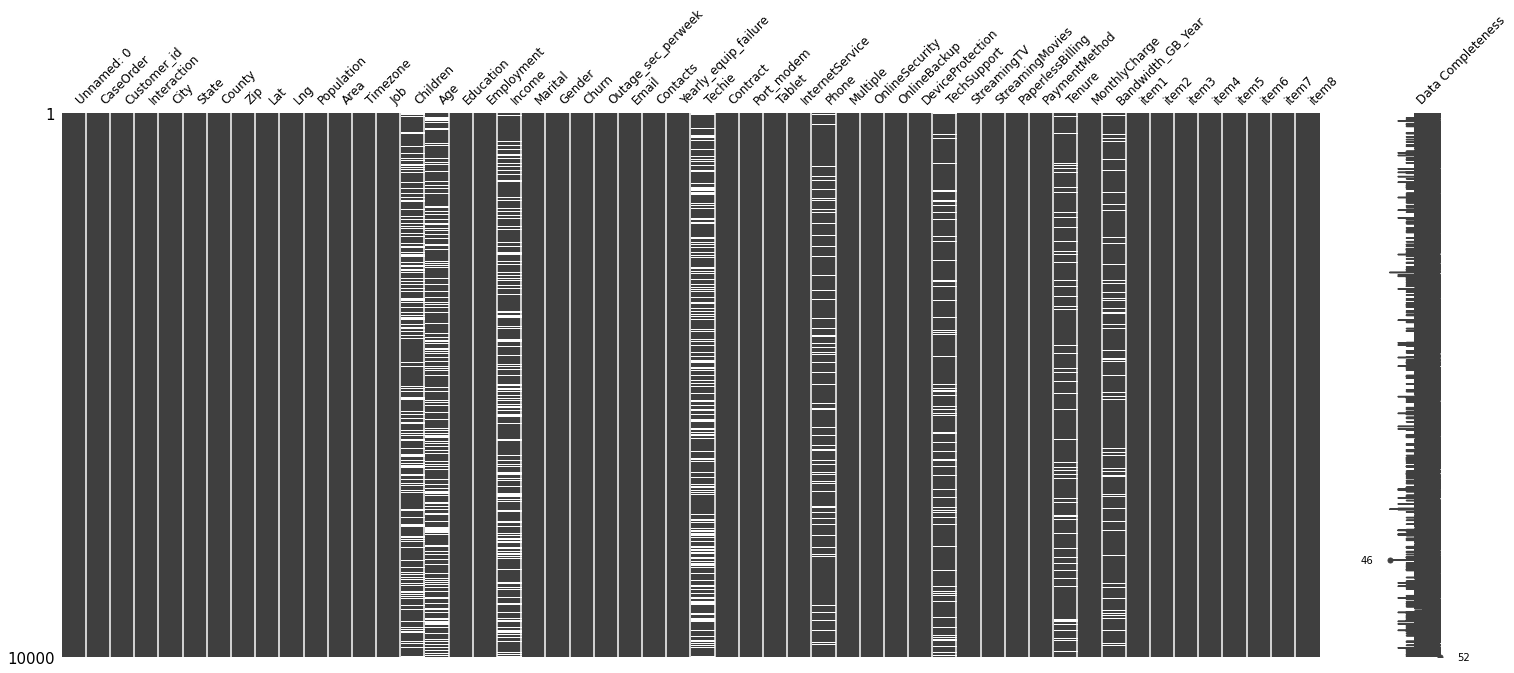

In [6]:
#Missingno visualization of missing data (Middleton, 2022a)
msno.matrix(df, fontsize = 12, labels = True)

array([[<AxesSubplot:title={'center':'Children'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Tenure'}>],
       [<AxesSubplot:title={'center':'Bandwidth_GB_Year'}>,
        <AxesSubplot:>]], dtype=object)

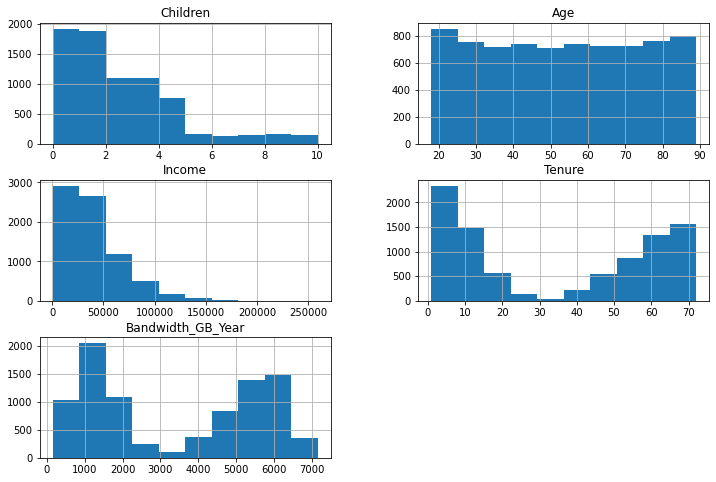

In [7]:
#Check each column containing null values that is a float or integer value. 
#Determine skew, possible ouliers, and distribution. 
df.hist(column=["Children", "Age", "Income", "Tenure", "Bandwidth_GB_Year"], figsize=(12,8))

0


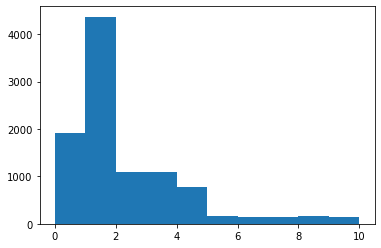

In [8]:
#Children column is right skewed, therefore I will use the median to impute the data. (Middleton, 2022a)
df['Children'].fillna(df['Children'].median(), inplace = True)

#verify the data was imputed 
print(df['Children'].isnull().sum())

#Check if the distribution of data was effected by the imputation of the median. 
plt.hist(df['Children'])
plt.show()

0


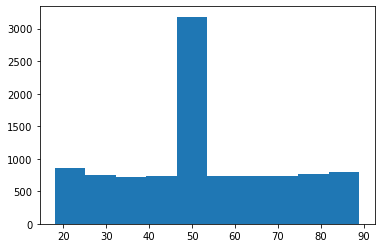

In [9]:
#Age column has a uniform distribution, therefore I will use the mean to impute the data. (Middleton, 2022a)
df['Age'].fillna(df['Age'].mean(), inplace = True)

#verify the data was imputed 
print(df['Age'].isnull().sum())

#Check if the distribution of data was effected by the imputation of the mean. 
plt.hist(df['Age'])
plt.show()

0


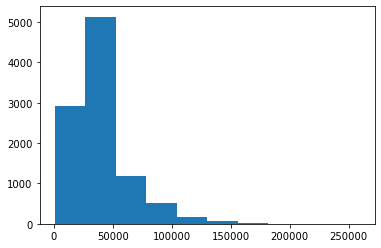

In [10]:
#Income column has is right skewed, therefore I will use the median to impute the data. (Middleton, 2022a)
df['Income'].fillna(df['Income'].median(), inplace = True)

#verify the data was imputed 
print(df['Income'].isnull().sum())

#Check if the distribution of data was effected by the imputation of the median. 
plt.hist(df['Income'])
plt.show()

0


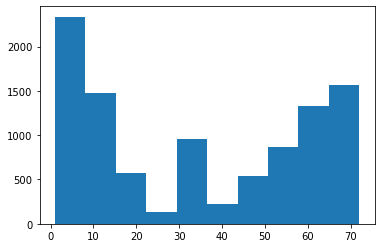

In [11]:
#Tenure column has a bimodal distribution, therefore I decided to use the median to impute the data. (Middleton, 2022a)  
df['Tenure'].fillna(df['Tenure'].median(), inplace = True)

#verify the data was imputed 
print(df['Tenure'].isnull().sum())

#Check if the distribution of data was effected by the imputation of the mean. 
plt.hist(df['Tenure'])
plt.show()

0


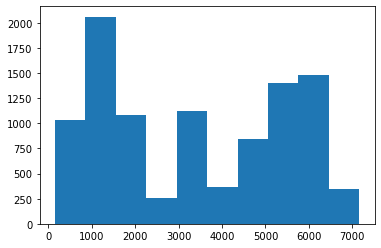

In [12]:
#Bandwidth_GB_Year column has a bimodal distribution, therefore I decided to use the median to impute the data. (Middleton, 2022a)  
df['Bandwidth_GB_Year'].fillna(df['Bandwidth_GB_Year'].median(), inplace = True)

#verify the data was imputed 
print(df['Bandwidth_GB_Year'].isnull().sum())

#Check if the distribution of data was effected by the imputation of the mean. 
plt.hist(df['Bandwidth_GB_Year'])
plt.show()

In [13]:
#Clean null values from object or text columns using the mode. (Middleton, 2022a)
#Techie column is text, therefore I will use the mode to impute the data. 
df['Techie'] = df['Techie'].fillna(df['Techie'].mode()[0])

#verify the data was imputed 
print(df['Techie'].isnull().sum())

0


In [14]:
#Phone column is text, therefore I will use the mode to impute the data. (Middleton, 2022a)
df['Phone'] = df['Phone'].fillna(df['Phone'].mode()[0])

#verify the data was imputed 
print(df['Phone'].isnull().sum())

0


In [15]:
#TechSupport column is text, therefore I will use the mode to impute the data. (Middleton, 2022a)
df['TechSupport'] = df['TechSupport'].fillna(df['TechSupport'].mode()[0])

#verify the data was imputed 
print(df['TechSupport'].isnull().sum())

0


In [16]:
#double-check all null values have been imputed
df.isnull().sum()

Unnamed: 0              0
CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMov

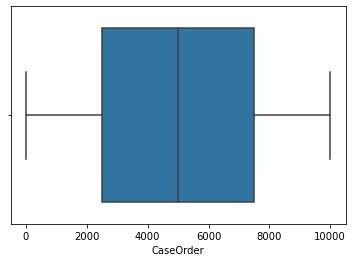

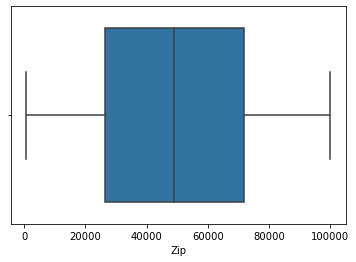

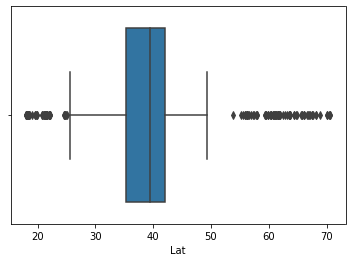

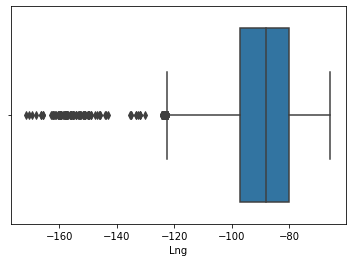

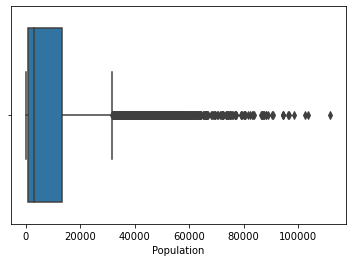

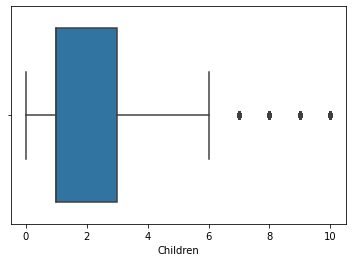

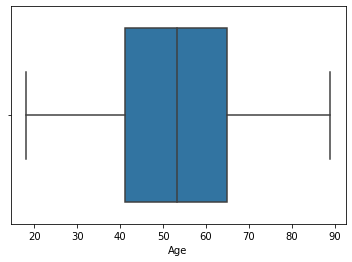

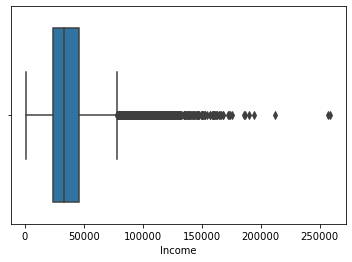

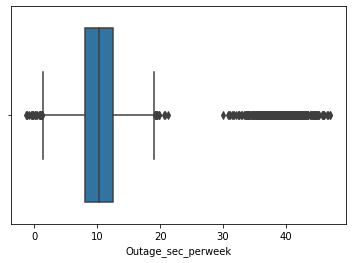

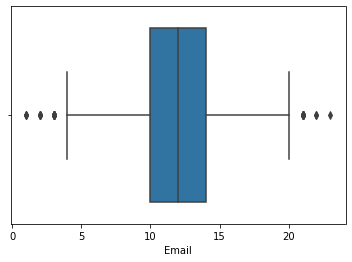

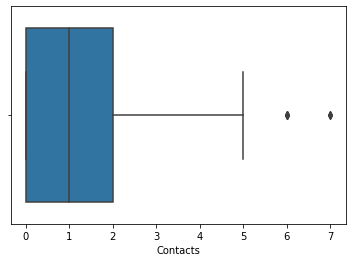

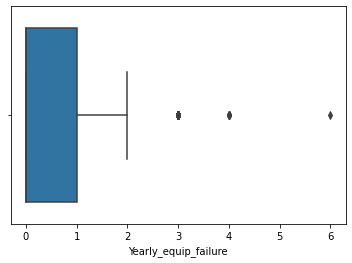

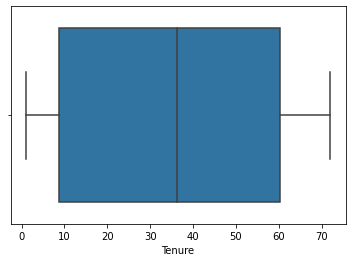

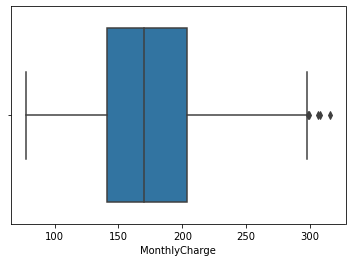

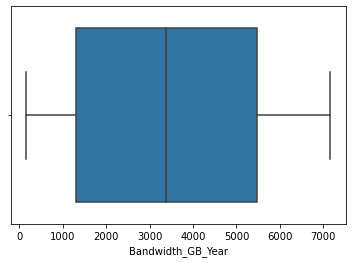

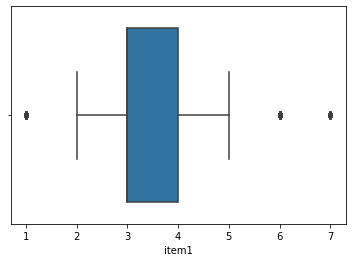

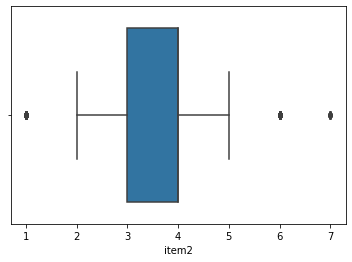

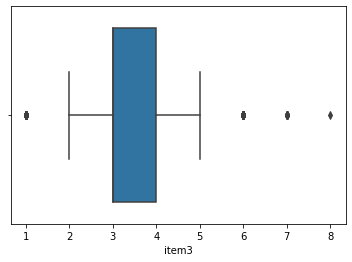

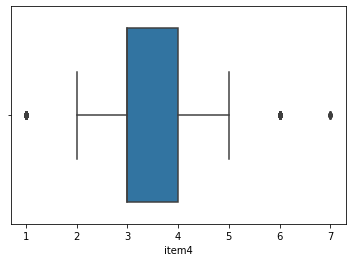

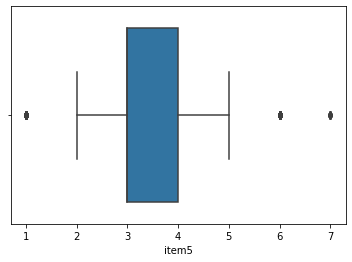

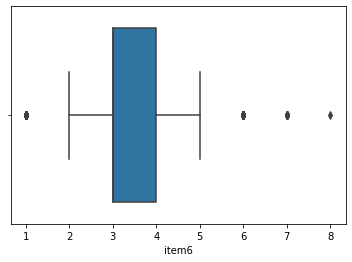

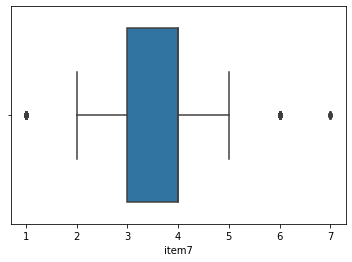

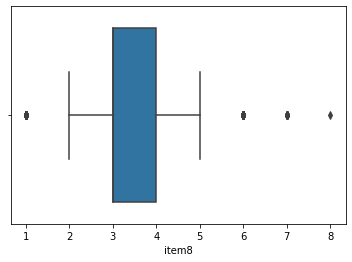

In [17]:
#Using Boxplots, check for outliers in each in each float or integer value column. (Middleton, 2022a)
caseorder_boxplot = sns.boxplot(x = "CaseOrder", data = df)
plt.show()

Zip_boxplot = sns.boxplot(x = "Zip", data = df)
plt.show()

Lat_boxplot = sns.boxplot(x = "Lat", data = df)
plt.show()

Lng_boxplot = sns.boxplot(x = "Lng", data = df)
plt.show()

Population_boxplot = sns.boxplot(x = "Population", data = df)
plt.show()

Children_boxplot = sns.boxplot(x = "Children", data = df)
plt.show()

Age_boxplot = sns.boxplot(x = "Age", data = df)
plt.show()

Income_boxplot = sns.boxplot(x = "Income", data = df)
plt.show()

Outage_sec_perweek_boxplot = sns.boxplot(x = "Outage_sec_perweek", data = df)
plt.show()

Email_boxplot = sns.boxplot(x = "Email", data = df)
plt.show()

Contancts_boxplot = sns.boxplot(x = "Contacts", data = df)
plt.show()

Yearly_equip_failure_boxplot = sns.boxplot(x = "Yearly_equip_failure", data = df)
plt.show()

Tenure_boxplot = sns.boxplot(x = "Tenure", data = df)
plt.show()

MonthlyCharge_boxplot = sns.boxplot(x = "MonthlyCharge", data = df)
plt.show()

Bandwidth_GB_Year_boxplot = sns.boxplot(x = "Bandwidth_GB_Year", data = df)
plt.show()

item1_boxplot = sns.boxplot(x = "item1", data = df)
plt.show()

item2_boxplot = sns.boxplot(x = "item2", data = df)
plt.show()

item3_boxplot = sns.boxplot(x = "item3", data = df)
plt.show()

item4_boxplot = sns.boxplot(x = "item4", data = df)
plt.show()

item5_boxplot = sns.boxplot(x = "item5", data = df)
plt.show()

item6_boxplot = sns.boxplot(x = "item6", data = df)
plt.show()

item7_boxplot = sns.boxplot(x = "item7", data = df)
plt.show()

item8_boxplot = sns.boxplot(x = "item8", data = df)
plt.show()

In [18]:
#Outliers found in Lat, Lng, Population, Children, Income, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, MonthlyCharge, item1, item2, item3, item4, item5, item6, item7, & item8 columns. 
#Treating outliers: 
print(df['Lat'].max())
print(df['Lat'].min())

70.64066
17.96612


In [19]:
#Retain outliers in Lat (Incuding US territories, the min and max are within a valid range) (Bathman, 2018)
print(df['Lng'].max())
print(df['Lng'].min())

-65.66785
-171.68815


In [20]:
#Retain outliers in Lng (Incuding US territories, the min and max are within a valid range) (Bathman, 2018)
print(df['Population'].describe())

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64


In [21]:
#Replace outlier population values > 27,000 
#New York City, NY, has the most density population in the US. In New York the max population density is a little over 27,000 per square mile. Therefore the right skewed outliers are likely entry errors. (Planning-Population-NYC Population Facts - DCP, n.d.)
df['Population'] = np.where(df['Population'] >= 27000, 2931, df['Population']) #(Singh, 2019)
print(df['Population'].describe())

count    10000.000000
mean      4949.264200
std       6338.293875
min          0.000000
25%        738.000000
50%       2910.500000
75%       5943.000000
max      26999.000000
Name: Population, dtype: float64


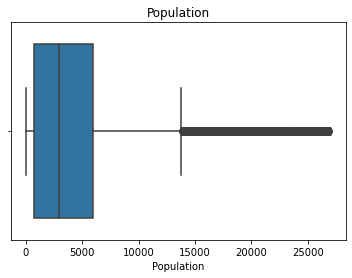

In [22]:
#Check distribution of population data. 
Population_boxplot = sns.boxplot(x = "Population", data = df).set_title("Population")
plt.show()

In [23]:
#Check that the max income is within a reasonable range
print(df['Income'].max())

#Check that the max and min outage_sec_perweek is within a reasonable range
print(df['Outage_sec_perweek'].max())
print(df['Outage_sec_perweek'].min())

258900.7
47.04928
-1.348571


In [24]:
#Retain outliers in Children (All values are possible children values)
#Retain outliers in Income (All values are possible income values)
df['Outage_sec_perweek'].describe()

count    10000.000000
mean        11.452955
std          7.025921
min         -1.348571
25%          8.054362
50%         10.202896
75%         12.487644
max         47.049280
Name: Outage_sec_perweek, dtype: float64

In [25]:
#Replace negative outliers in Outage_sec_perweek with median because you cannot have less than zero secons of outage
df['Outage_sec_perweek'] = np.where(df['Outage_sec_perweek'] < 0, 10.214231, df['Outage_sec_perweek']) #(Singh, 2019)
print(df['Outage_sec_perweek'].describe())

count    10000.000000
mean        11.464828
std          7.014674
min          0.113821
25%          8.066905
50%         10.213912
75%         12.487644
max         47.049280
Name: Outage_sec_perweek, dtype: float64


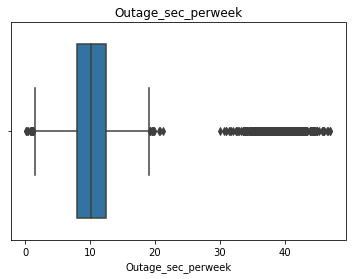

In [26]:
#Check distribution of Outage_sec_perweek data. 
Outage_sec_perweek_boxplot = sns.boxplot(x = "Outage_sec_perweek", data = df).set_title("Outage_sec_perweek")
plt.show()

In [27]:
#Check that the MonthlyCharge income is within a reasonable range
print(df['MonthlyCharge'].max())

315.8786


In [28]:
#Retain outliers in Email (All values are possible email values)
#Retain outliers in Contacts (All values are possible contact values)
#Retain outliers in Yearly_equip_failure (All values are possible equipment failure values)
#Retain outliers in MonthlyCharge (All values are possible monthly charge values)
#Retain outliers in all item answers (All values are possible values for each item answer)

In [29]:
#Re-expressing Categorical Variables (Middleton, 2022c)
#Practice label encoding yes/no dichotomous binary columns. (By Great Learning Team -, 2022)
labelencoder = LabelEncoder()
df['Churn'] = labelencoder.fit_transform(df['Churn'])
print(df['Churn'].head())

0    0
1    1
2    0
3    0
4    1
Name: Churn, dtype: int64


In [30]:
df['Techie'] = labelencoder.fit_transform(df['Techie'])
df['Port_modem'] = labelencoder.fit_transform(df['Port_modem'])
df['Phone'] = labelencoder.fit_transform(df['Phone'])

In [31]:
#Practice Ordinal Encoding (Middleton, 2022c)
#First find unique entiries in the education table. 
print(df['Education'].unique())
print(len(df['Education'].unique()))

["Master's Degree" 'Regular High School Diploma' 'Doctorate Degree'
 'No Schooling Completed' "Associate's Degree" "Bachelor's Degree"
 'Some College, Less than 1 Year' 'GED or Alternative Credential'
 'Some College, 1 or More Years, No Degree'
 '9th Grade to 12th Grade, No Diploma' 'Nursery School to 8th Grade'
 'Professional School Degree']
12


In [32]:
df['Education_numeric'] = df['Education'] 
dict_edu = {'Education_numeric': {'No Schooling Completed': 0, 'Nursery School to 8th Grade': 1, '9th Grade to 12th Grade, No Diploma': 2, 'GED or Alternative Credential': 3, 'Regular High School Diploma': 4, 'Some College, Less than 1 Year': 5, 'Some College, 1 or More Years, No Degree': 6, "Associate's Degree": 7, 'Professional School Degree': 8, "Bachelor's Degree": 9, "Master's Degree": 10, 'Doctorate Degree': 11}}
df.replace(dict_edu, inplace = True) #(Middleton, 2022c)

In [33]:
#Check that Education_numeric was created correctly.
df['Education_numeric'].unique()

array([10,  4, 11,  0,  7,  9,  5,  3,  6,  2,  1,  8])

In [34]:
#Principal Component Analysis (Middleton, 2022b)
PCA_df = df[['Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8']]
PCA_df_normalized = (PCA_df - PCA_df.mean()) / PCA_df.std()
pca = PCA(n_components = PCA_df.shape[1])
pca.fit(PCA_df_normalized)

PCA(n_components=22)

In [35]:
test_pca = pd.DataFrame(pca.transform(PCA_df_normalized), 
                        columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22'])
#(Middleton, 2022b)

In [36]:
#PCA Loadings (Middleton, 2022b)
loadings = pd.DataFrame(pca.components_.T, 
                        columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22'],
                        index = PCA_df_normalized.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
Zip,-0.018857,0.640196,0.274515,0.044818,-0.106838,0.071944,0.031719,0.000492,-0.005511,0.022139,...,0.002398,-0.029411,-0.012342,-0.006171,-0.012355,-0.002884,-0.003716,0.010657,0.038797,-0.700159
Lat,-0.001599,0.063060,0.006528,0.007661,0.604093,-0.349158,-0.176803,0.012347,-0.058159,-0.109777,...,-0.200539,0.623343,0.088237,-0.006956,0.017977,-0.005654,0.020434,-0.004895,0.007603,-0.112268
Lng,0.016820,-0.645631,-0.274957,-0.043551,0.022623,-0.021301,-0.005119,0.002327,0.017931,-0.000857,...,0.029223,-0.084953,-0.002360,0.006683,0.009532,0.011353,-0.009383,-0.009367,0.040591,-0.702603
Population,0.000251,-0.096550,-0.052923,-0.014276,-0.535631,0.363898,0.109653,0.142259,-0.134156,-0.112202,...,-0.170708,0.685233,-0.030817,-0.028835,-0.035797,0.001980,0.030228,0.003641,0.000951,-0.013681
Children,0.000736,-0.026545,-0.012707,0.007702,0.165599,-0.099441,0.558512,-0.066208,0.020563,0.492645,...,-0.019748,0.133306,0.026084,-0.038932,-0.019901,0.011732,0.020452,-0.007652,-0.018347,0.000475
Age,0.005070,0.004086,-0.012632,-0.017399,-0.072021,-0.004860,-0.490109,0.340508,0.254077,0.358063,...,0.092019,0.069357,-0.061502,0.009482,-0.001341,-0.012329,0.008820,0.016059,0.021567,0.002185
Income,-0.000873,-0.002272,0.007400,0.024225,0.051800,-0.034238,0.167306,0.410633,-0.701749,0.362285,...,-0.039235,-0.114782,0.010126,-0.058476,-0.004633,0.000670,0.013247,0.004827,0.001298,0.001734
Outage_sec_perweek,-0.013735,0.000195,0.019272,-0.047173,0.404985,0.575669,0.041002,0.021814,-0.013759,0.006793,...,0.671523,0.164355,-0.123329,0.011730,-0.014749,-0.018087,0.010968,-0.004123,0.000781,-0.000624
Email,0.008819,-0.004337,-0.024412,-0.006065,-0.088799,0.126892,-0.108678,-0.656267,0.083363,0.563813,...,-0.087029,0.134843,0.072636,-0.017545,-0.016183,0.006629,-0.015666,0.001024,0.005607,-0.003237
Contacts,-0.008451,-0.010349,-0.000432,-0.011705,-0.045885,0.025840,-0.525484,0.156946,-0.135355,0.322084,...,0.013622,0.007556,0.037937,-0.036263,-0.003887,-0.026234,0.020794,-0.000675,-0.002786,0.002123


In [37]:
#Use Kaiser Rule to create scree plot/elbow charts of eigenvalues to determine which PCs should be kept (>1) (Middleton, 2022b)
cov_matrix = np.dot(PCA_df_normalized.T, PCA_df_normalized) / PCA_df.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

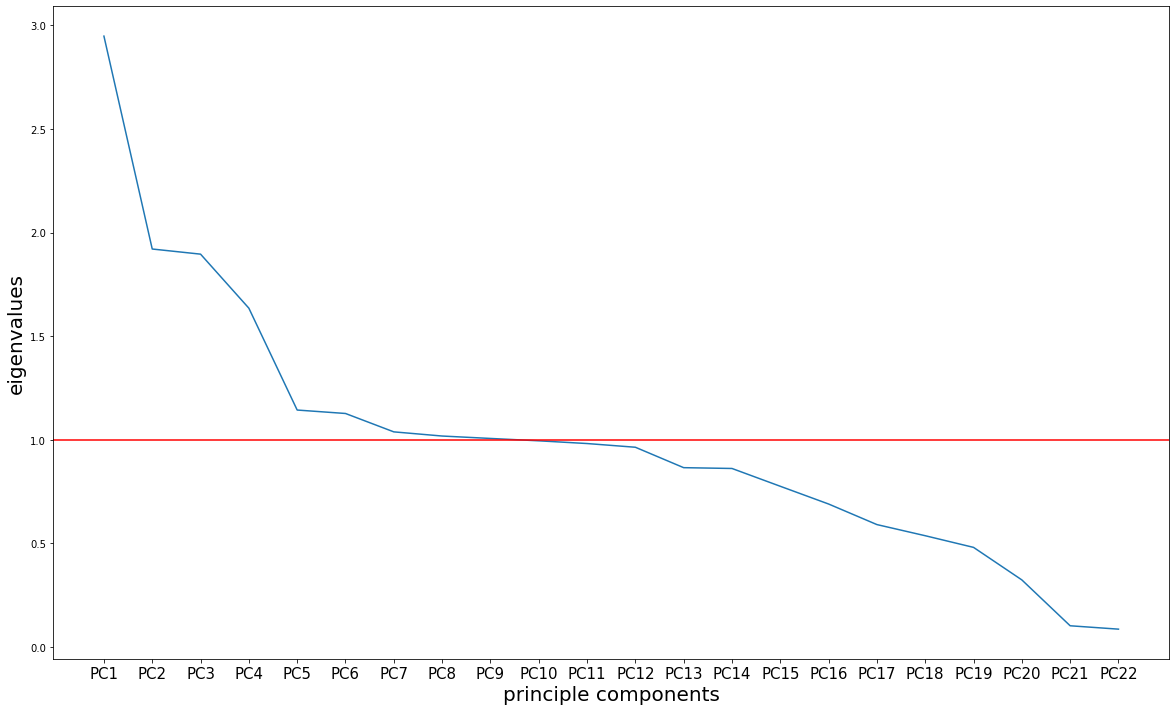

In [38]:
plt.figure(figsize=(20, 12))
plt.plot(eigenvalues)
ax1 = plt.subplot()
ax1.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])
ax1.set_xticklabels(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22'], fontsize = 15)
plt.xlabel('principle components', fontsize = 20)
plt.ylabel('eigenvalues', fontsize = 20)
plt.axhline(y=1, color='red')
plt.show()

In [39]:
df.to_csv('/Users/Amanda.Hartzler/Desktop/D206_PA.csv')